In [18]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [19]:
# reading csv file
df = pd.read_csv('../dataset/crops_final.csv')

In [20]:
#df.drop('Harvest Temp', axis=1,inplace=True)
# converting from pandas dataframe to numpy
np_inputs = df.to_numpy()

In [21]:
# inputs are from col-6 to col-13
inputs = np_inputs[:, 6:14]
inputs = np.array(inputs, dtype='float32')

print(inputs)



# convert output crops to binary encoded labels
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np_inputs[:,14])
outputs = lb.transform(np_inputs[:,14])

outputs = np.array(outputs, dtype='float32')

print(outputs)

[[32.619118   6.8041816 63.141884  ...  4.5212717 14.998593  12.280917 ]
 [30.113255   7.360165  61.930634  ...  4.54938   15.128822  12.31593  ]
 [32.86468    7.3836966 62.03019   ...  4.5945315 14.124709  12.205821 ]
 ...
 [21.732143   6.63041   42.23988   ... 51.347816  29.18824   12.777757 ]
 [22.688066   6.362192  35.849293  ... 48.710094  27.44639   12.33395  ]
 [21.025482   6.1696644 70.2149    ... 50.24635   26.575783  10.986518 ]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [22]:
# converting numpy array into torch tensors
inputs = torch.from_numpy(inputs)
outputs = torch.from_numpy(outputs)

print(inputs)
print(outputs)

tensor([[32.6191,  6.8042, 63.1419,  ...,  4.5213, 14.9986, 12.2809],
        [30.1133,  7.3602, 61.9306,  ...,  4.5494, 15.1288, 12.3159],
        [32.8647,  7.3837, 62.0302,  ...,  4.5945, 14.1247, 12.2058],
        ...,
        [21.7321,  6.6304, 42.2399,  ..., 51.3478, 29.1882, 12.7778],
        [22.6881,  6.3622, 35.8493,  ..., 48.7101, 27.4464, 12.3340],
        [21.0255,  6.1697, 70.2149,  ..., 50.2463, 26.5758, 10.9865]])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [23]:
from torch.utils.data import TensorDataset

In [24]:
ds = TensorDataset(inputs,outputs)
print(len(ds))
print(ds[0:3])

121081
(tensor([[32.6191,  6.8042, 63.1419, 31.8323, 36.0894,  4.5213, 14.9986, 12.2809],
        [30.1133,  7.3602, 61.9306, 31.7180, 39.6473,  4.5494, 15.1288, 12.3159],
        [32.8647,  7.3837, 62.0302, 31.8742, 35.8610,  4.5945, 14.1247, 12.2058]]), tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


In [25]:
from torch.utils.data import random_split

In [26]:
train_ds, valid_ds = random_split(ds, [96865, 24216])
len(train_ds), len(valid_ds)

(96865, 24216)

In [27]:
from torch.utils.data import DataLoader

In [28]:
batch_size = 64
train_loader = DataLoader(train_ds , batch_size , shuffle=True )
val_loader = DataLoader(valid_ds , batch_size)
print(len(train_loader))

1514


In [29]:
from torch import nn

# defining neural network parameteres
input_nodes = 8
hidden1_nodes = 128
hidden2_nodes = 128
output_nodes = 29

# creating neural net
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(input_nodes, hidden1_nodes)
        self.hidden1 = nn.Linear(hidden1_nodes, hidden2_nodes)
        self.hidden2 = nn.Linear(hidden2_nodes, output_nodes)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input(x)
        x = self.relu(x)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.softmax(x)

        return x

In [30]:
model = Model()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2581,  0.0027,  0.1920,  ..., -0.1665,  0.3195,  0.1416],
         [-0.1419, -0.3445, -0.1335,  ..., -0.1858,  0.3412,  0.1519],
         [ 0.2388, -0.3131, -0.1929,  ...,  0.0464, -0.0354,  0.2755],
         ...,
         [ 0.1397,  0.0094, -0.3507,  ..., -0.1579,  0.3159,  0.1161],
         [-0.1624, -0.1901, -0.0557,  ..., -0.3073,  0.0459, -0.1414],
         [ 0.3040, -0.1529,  0.0737,  ...,  0.2312, -0.0967,  0.0335]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.2892, -0.0811,  0.2834,  0.0526,  0.0546,  0.1613, -0.0774,  0.1764,
          0.1001, -0.2384, -0.1137, -0.3087, -0.2936,  0.1555,  0.2477,  0.2961,
         -0.2343, -0.2061,  0.1745,  0.0784,  0.1614, -0.2926, -0.2382,  0.1563,
         -0.2599,  0.1028,  0.0105,  0.0400,  0.0262, -0.2588,  0.0467, -0.1171,
         -0.3025, -0.0097,  0.2909,  0.1575, -0.3161, -0.1067, -0.0573,  0.0724,
         -0.1499,  0.1918,  0.3148,  0.3335, -0.3222,  0.2985, -0.0840, -0.2297

In [31]:
import torch.nn.functional as F

loss_dict={}
def train(model,epochs,train_batch,valid_batch,lr,opt_fn=torch.optim.SGD):
    opt = opt_fn(model.parameters(), lr)
    for epoch in range(epochs):
        loss_dict[epoch] = 0
        i = 0
        for input_part, output_part in train_batch:
            i+=1
            output = model(input_part)
            loss = F.mse_loss(output,output_part)
            loss_dict[epoch]+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
            #print("Done with {0} part of {1}/{2}".format(i,epoch,epochs))
        loss_dict[epoch]/1514
        print("For epoch {0} avg_loss = {1}".format(epoch,loss_dict[epoch]))
    return loss_dict

In [15]:
epochs = 60
lr = 1e-2

history = train(model, epochs, train_loader, val_loader, lr)

For epoch 0 avg_loss = 52.91108322143555
For epoch 1 avg_loss = 51.06782150268555
For epoch 2 avg_loss = 50.69636535644531
For epoch 3 avg_loss = 50.584373474121094
For epoch 4 avg_loss = 50.51202392578125
For epoch 5 avg_loss = 50.450504302978516
For epoch 6 avg_loss = 50.397247314453125
For epoch 7 avg_loss = 50.353981018066406
For epoch 8 avg_loss = 50.316837310791016
For epoch 9 avg_loss = 50.286006927490234
For epoch 10 avg_loss = 50.25830841064453
For epoch 11 avg_loss = 50.22936248779297
For epoch 12 avg_loss = 50.197566986083984
For epoch 13 avg_loss = 50.16925811767578
For epoch 14 avg_loss = 50.13800048828125
For epoch 15 avg_loss = 50.10002136230469
For epoch 16 avg_loss = 50.04446029663086
For epoch 17 avg_loss = 50.002098083496094
For epoch 18 avg_loss = 49.97929763793945
For epoch 19 avg_loss = 49.962772369384766
For epoch 20 avg_loss = 49.94807052612305
For epoch 21 avg_loss = 49.93580627441406
For epoch 22 avg_loss = 49.92451477050781
For epoch 23 avg_loss = 49.91460418

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

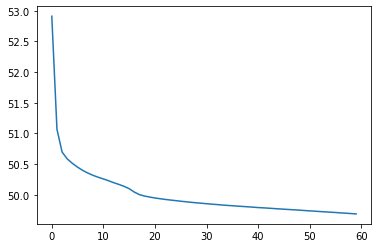

In [17]:
plt.plot(list(loss_dict.keys()), list(loss_dict.values()))
plt.show()

In [18]:
torch.save(model.state_dict(), 'crop_prediction_weights_2.pth')

In [19]:
model.state_dict()

OrderedDict([('input.weight',
              tensor([[-3.2542e-01, -3.1018e-01,  3.3977e-01, -3.2862e-02, -1.9732e-01,
                       -1.1428e-01,  1.1619e-01,  2.8608e-01],
                      [ 3.5996e-01,  1.3895e-01, -1.4563e-01,  3.6921e-01, -2.2927e-01,
                        2.1933e-01, -4.0005e-01,  2.4126e-01],
                      [-1.8391e-01,  2.8096e-01,  1.1709e-02, -2.3658e-01,  2.7456e-01,
                        2.9811e-01, -3.5366e-01,  3.1016e-01],
                      [-2.3667e-01, -3.0875e-01,  2.5648e-01, -1.0824e-01,  1.2827e-01,
                        1.4139e-01,  4.6707e-02, -4.7841e-01],
                      [-1.5888e-01, -1.0514e-01, -1.3736e-01, -2.9876e-01,  2.3532e-01,
                       -6.7131e-02, -2.6553e-01, -1.0066e-01],
                      [ 3.5511e-01, -2.3496e-01, -1.0138e-01,  1.6755e-01, -3.3340e-01,
                       -3.3512e-01,  3.2877e-01, -7.0164e-02],
                      [-1.8500e-01, -1.8730e-01, -1.0319e-01,  3

In [20]:
model2 = Model()
model2.load_state_dict(torch.load('crop_prediction_weights.pth'))
model2.state_dict()

OrderedDict([('input.weight',
              tensor([[ 1.4240e-01,  3.0208e-01,  3.3952e-01,  4.0957e-01, -2.1840e-01,
                        7.7345e-02, -1.1007e-01, -6.7018e-02],
                      [-1.6411e-01, -3.2685e-01, -3.2188e-02, -1.7808e-01,  2.6823e-01,
                       -2.3882e-01,  1.7069e-01,  2.4261e-01],
                      [-2.9862e-01,  1.3380e-01,  3.0032e-01,  8.4978e-02, -1.1280e-01,
                        3.9817e-01,  3.1366e-01, -8.1339e-02],
                      [-3.3819e-01, -7.2151e-02,  2.0203e-01, -3.1742e-01,  1.6309e-01,
                       -3.4058e-01,  2.2519e-01,  2.2271e-01],
                      [-1.3653e-01,  3.2881e-01, -2.8039e-01, -7.7726e-02, -1.7620e-01,
                        7.9638e-02,  2.9207e-01, -2.4837e-01],
                      [-2.6533e-01, -2.8714e-01,  2.9645e-02,  2.8596e-01,  2.1628e-01,
                        2.1521e-01,  2.7535e-01, -3.3423e-01],
                      [ 2.9354e-01, -1.7299e-01, -2.2842e-01,  1

In [25]:
crops = ['arhar', 'bajra', 'barley', 'coriander', 'cotton', 'cowpea', 'dry chillies', 'garlic', 'ginger', 'gram', 'groundnut', 'jowar', 'linseed', 'maize-k', 'maize-r', 'masoor', 'moong', 'onion', 'peas&beans', 'potato', 'ragi', 'rapeseed', 'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad', 'wheat']


pred_user = model2(torch.from_numpy(np.array([[20, 7.4, 78, 23, 28, 15, 18, 5]], dtype='float32')))
print(pred_user)

greater_than_zero={}
index = -1

for i in pred_user:
    for p in i:
        index+=1
        if(p > 0):
            greater_than_zero[crops[index]] = p 
    for i in greater_than_zero:
        print("Crop:- {0}  Probab:- {1}".format(i,greater_than_zero[i]*100))

tensor([[1.1137e-03, 1.0728e-04, 4.4431e-06, 9.9732e-07, 3.2659e-02, 1.3428e-02,
         3.3147e-01, 1.3052e-03, 2.6530e-04, 3.1458e-04, 9.3813e-04, 2.3722e-02,
         2.4871e-01, 1.7424e-02, 5.0516e-04, 1.7932e-02, 1.7657e-03, 5.1582e-07,
         1.3871e-01, 5.3930e-02, 1.2608e-05, 7.1804e-07, 4.4971e-03, 7.4200e-02,
         5.7790e-04, 3.1376e-03, 1.7156e-06, 3.3251e-02, 1.7217e-05]],
       grad_fn=<SoftmaxBackward>)
Crop:- arhar  Probab:- 0.11136536300182343
Crop:- bajra  Probab:- 0.010728138498961926
Crop:- barley  Probab:- 0.00044431290007196367
Crop:- coriander  Probab:- 9.973191481549293e-05
Crop:- cotton  Probab:- 3.265881061553955
Crop:- cowpea  Probab:- 1.342787742614746
Crop:- dry chillies  Probab:- 33.14677047729492
Crop:- garlic  Probab:- 0.13052260875701904
Crop:- ginger  Probab:- 0.0265301875770092
Crop:- gram  Probab:- 0.031458210200071335
Crop:- groundnut  Probab:- 0.09381312131881714
Crop:- jowar  Probab:- 2.3722035884857178
Crop:- linseed  Probab:- 24.871213912